### ```joblib``` - Save Model

In [19]:
#Imports
from sklearn.linear_model import LinearRegression
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import jovian
#Some random data from a GitHub profile
file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
df = pd.read_csv(file)
df.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


Let's create a dummy model to illustrate this.

In [20]:
#For reference for the code below, this makes a column vector
df['Por'].values.reshape(-1, 1)

array([[12.08],
       [12.38],
       [14.02],
       [17.67],
       [17.52],
       [14.53],
       [13.49],
       [11.58],
       [12.52],
       [13.25],
       [15.04],
       [16.19],
       [16.82],
       [17.39],
       [13.83],
       [11.34],
       [19.55],
       [15.58],
       [14.73],
       [12.47],
       [18.08],
       [16.32],
       [12.62],
       [10.03],
       [18.66],
       [ 7.27],
       [15.78],
       [15.73],
       [12.38],
       [12.89],
       [18.48],
       [14.74],
       [12.55],
       [13.58],
       [11.76],
       [11.98],
       [13.56],
       [16.55],
       [15.22],
       [14.54],
       [14.37],
       [15.4 ],
       [10.14],
       [11.09],
       [18.37],
       [14.71],
       [ 9.29],
       [11.85],
       [18.59],
       [18.18],
       [18.72],
       [20.96],
       [15.31],
       [11.98],
       [18.16],
       [13.61],
       [13.67],
       [15.21],
       [16.1 ],
       [13.  ],
       [18.32],
       [14.96],
       [

Note - credit to aegis for the following ```LinearRegression``` visualization code. Check out his github linked on the graph

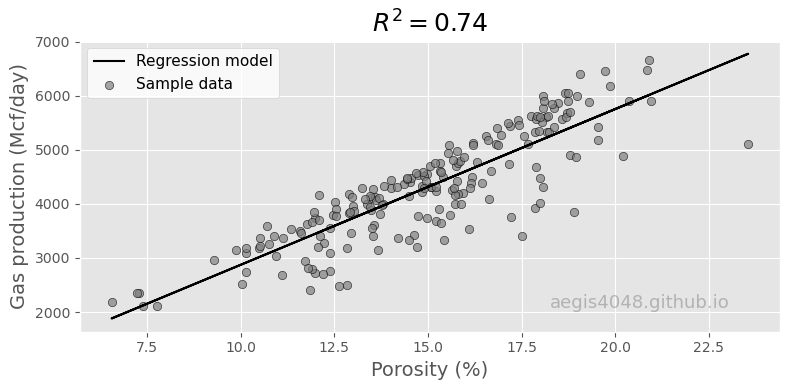

In [21]:
#Making the dummy linear regression called "model"
X = df['Por'].values.reshape(-1,1)
y = df['Prod'].values

################################################ Train #############################################

ols = LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

############################################## Evaluate ############################################

r2 = model.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

Use ```joblib.dump(value = <model_name>, filename = '<filename>')``` to save a model to a file. 

In [22]:
joblib.dump(value = model, filename = 'models/LinearRegressionTestModel.m')

['models/LinearRegressionTestModel.m']

Later, if you want to load this model, simply use ```joblib.load(filename = '<filename>')```

In [25]:
jovian.commit(message = "Added joblib.load cell")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "lukeanglin/saving-and-evaluating-models" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/lukeanglin/saving-and-evaluating-models


'https://jovian.ai/lukeanglin/saving-and-evaluating-models'

In [23]:
#Now, let's "lose" our model, and get it back again.
del model
joblib.load(filename = 'models/LinearRegressionTestModel.m')

LinearRegression()

### Evaluating Models

#### RMSE

Let's use get the **RMSE**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#Construct Lin Reg
lin_reg = LinearRegression()

#Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Fit on training set
lin_reg.fit(X_train, y_train)

#Predict on X_test
y_pred = lin_reg.predict(X_test)

#Calculate rmse
mse = mean_squared_error(y_true = y_test, y_pred = y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 499.4321238305577


#### Confidence Intervals

Now, let's compute a **confidence interval** on this, using ```scipy```, which has a convenient ```stats``` module for this type of thing!  It's crucial to remember that this *works only on individual elements*.  Therefore we want to calculate the **squared error** of individual elements and then pass it into the ```stats.t.interval(confidence_level, sample-size - 1, MSE, SE)```

Note that the ```sem``` function of ```scipy``` is used to calculate the standard error

In [11]:
#Import the stats module
from scipy import stats

#Set confidence level (alpha)
confidence_level = 0.95

#Calculate sample-size - subtract 1 because sample, not population
sample_size = len(y_test) - 1

#In this case, we have the MSE


#Calculate element-wise standard error
sq_err = (y_test-y_pred)**2
SE = stats.sem(sq_err)

#Plug into T Interval, and take the square root for comparison to our RMSE
rmse_interval = np.sqrt(stats.t.interval(confidence_level, sample_size, mse, SE))
print(f"RMSE: {rmse}")
print(f"RMSE Interval: {rmse_interval}")

RMSE: 499.4321238305577
RMSE Interval: [386.8965123  590.91114509]


#### Sensitivity/Recall

* **Sensitivity/Recall** - % of positives labeled correctly:
$$
\frac{True Positives}{True Positives + False Negatives}
$$

$$
\frac{Correct Positives}{Actually Positive}
$$

#### Specificty

* **Specificity** - % of correct identifications of negatives:
$$
\frac{True Negatives}{False Positives + True Negatives}
$$

#### Sensitivity vs Specifity

* Sensitivity - Higher means good at identifying positives
* Specifity - Higher means good at identifying negatives

#### Precision

* **Precision** - % proportion of positives correctly identified:
$$
\frac{True Positives}{False Positives + True Positives}
$$


$$
\frac{Correct Positives}{Positive Labels}
$$


* How often you guessed a positive, and it was positive

As you may have guessed, there is an inverse relationship between precision and recall.  We sometimes care about precision, sometimes about recall, and sometimes about both.  ![](https://miro.medium.com/max/700/0*XEO3pwAee7tBT_D1.png)

#### Accuracy

One final measure - **Accuracy**

$$
\frac{True Positives + True Negatives}{True Positives + False Positives + True Negatives + False Negatives}
$$


$$
\frac{Correct Labels}{Labeled Data}
$$
* Only use this one when you have a **balanced dataset**.  Otherwise, use precision or recall

#### F1

The best of all!  An **F1** score will only be high if recall and precision are high.  To use in sklearn.

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

#### Confusion Matrices

**Confusion Matrices** show the amount of True/False Positives/Negatives.
* Diagonal from top left to bottom right is the correct predictions

![](https://miro.medium.com/max/531/1*YzVnfRRWBLvtv2yNDzU98g.png)

In [3]:
confusion_matrix

Predicted,0,1
Actual,,
0,5,2
1,1,4


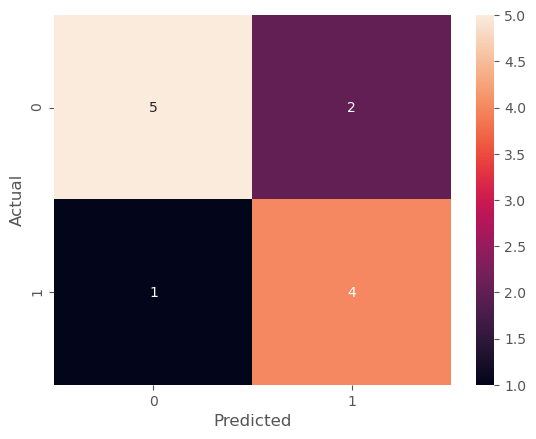

In [12]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()

With sklearn . . . use ```confusion_matrix```, or plot a confusion matrix with the ```plot_confusion_matrix(model, X, y)``` function

In [13]:
#Just making a confusion Matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
y_actual = [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
y_predicted = [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
confusion_matrix(y_actual, y_predicted)

array([[5, 2],
       [1, 4]])

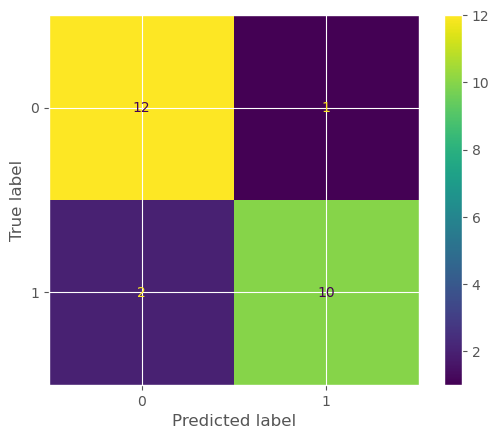

In [14]:
#Plotting one
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0, probability=True)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

#### ROC

This brings us to confusion matrix metrics, like the ```roc_auc_score```
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_roc_thumb.png)

In [15]:
from sklearn.metrics import roc_auc_score
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y, scores)

0.75

#### More Examples

For more on evaluating models, see [this Jupyter notebook](http://localhost:8888/notebooks/Classification%20-%20Happiness%20Score.ipynb#F1)